# Programming Assignment 3

Dataset = IMDB data

## Import libraries

In [1]:
import pandas as pd
import re

## Load dataset

In [2]:
dataset = pd.read_csv("IMDB Dataset.csv")

In [3]:
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
dataset["review"].head()

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

In [5]:
dataset.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
dataset.shape

(50000, 2)

## Data cleaning and Data preparation

In [7]:
dataset.isnull().sum().sort_values()

review       0
sentiment    0
dtype: int64

### Label encoding

In [8]:
dataset.loc[dataset['sentiment'] == 'positive','sentiment'] = 1
dataset.loc[dataset['sentiment'] == 'negative', 'sentiment'] = 0

In [9]:
dataset.tail

<bound method NDFrame.tail of                                                   review sentiment
0      One of the other reviewers has mentioned that ...         1
1      A wonderful little production. <br /><br />The...         1
2      I thought this was a wonderful way to spend ti...         1
3      Basically there's a family where a little boy ...         0
4      Petter Mattei's "Love in the Time of Money" is...         1
...                                                  ...       ...
49995  I thought this movie did a down right good job...         1
49996  Bad plot, bad dialogue, bad acting, idiotic di...         0
49997  I am a Catholic taught in parochial elementary...         0
49998  I'm going to have to disagree with the previou...         0
49999  No one expects the Star Trek movies to be high...         0

[50000 rows x 2 columns]>

### Convert everything to lowercase and remove unwanted characters

In [10]:
dataset['review'] = dataset['review'].str.lower().str.replace('[^a-z\\s]', '', regex=True)

In [11]:
dataset['review'][4889]

'the actors cannot act all dialoague was plagued with bad accents and loss of character channing tatum never moves his lips or changes his facial expression everbr br the story is nothing new at all some kid from the street gets involved in a professional world of dance and it turns his life around that coupled with the whole incident involving the little kid is taken straight from you got served and save the last dance im not saying that those movies were any good either but that is to say that this movie brought nothing new to the tablebr br and the dancing there were only  dance sequences in the entire movie and  of them were taken straight from the commercial perhaps im being overly critical because i am a dancer but maybe thats what needs to be heard channing tatum is not by any means a bboy his little solo in the parking lot had little style technique or any wow factor all of which are part of a street dancers criteria all of the jazz and ballet in the movie had nothing to offer 

In [12]:
dataset.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production br br the filmin...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1


In [13]:
dataset.to_csv('IMDB Dataset_cleaned.csv', index=False)

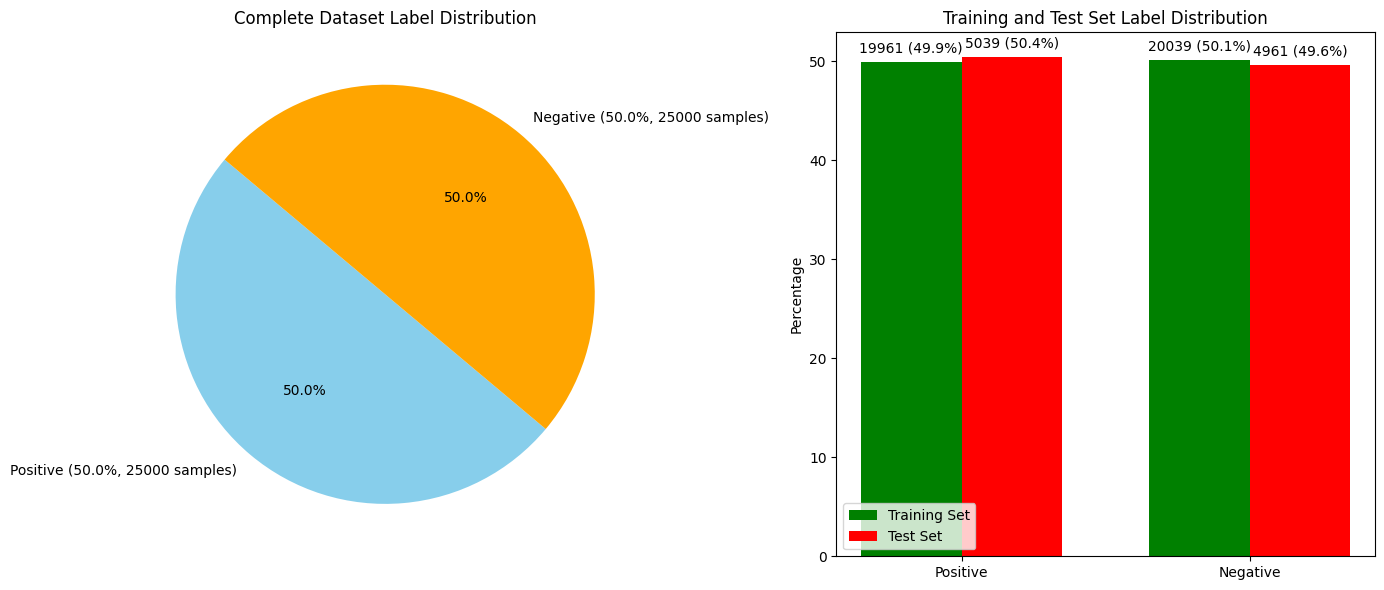

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = dataset

X_train, X_test, y_train, y_test = train_test_split(
    data['review'], data['sentiment'], test_size=0.2, random_state=42
)

def calculate_label_distribution(labels):
    counts = labels.value_counts()
    total = len(labels)
    percentages = (counts / total) * 100
    return counts, percentages

full_counts, full_percentages = calculate_label_distribution(data['sentiment'])
train_counts, train_percentages = calculate_label_distribution(y_train)
test_counts, test_percentages = calculate_label_distribution(y_test)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].pie(
    full_counts, labels=[f"Positive ({full_percentages[1]:.1f}%, {full_counts[1]} samples)",
                         f"Negative ({full_percentages[0]:.1f}%, {full_counts[0]} samples)"],
    autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange']
)
axes[0].set_title('Complete Dataset Label Distribution')

bar_labels = ['Positive', 'Negative']
bar_train = [train_percentages[1], train_percentages[0]]
bar_test = [test_percentages[1], test_percentages[0]]
bar_train_counts = [train_counts[1], train_counts[0]]
bar_test_counts = [test_counts[1], test_counts[0]]

x = range(len(bar_labels))
bar_width = 0.35

axes[1].bar(x, bar_train, width=bar_width, color='green', label='Training Set')
axes[1].bar([p + bar_width for p in x], bar_test, width=bar_width, color='red', label='Test Set')

# Annotate with counts
for i in range(len(bar_labels)):
    axes[1].text(i, bar_train[i] + 1, f"{bar_train_counts[i]} ({bar_train[i]:.1f}%)", ha='center', color='black')
    axes[1].text(i + bar_width, bar_test[i] + 1, f"{bar_test_counts[i]} ({bar_test[i]:.1f}%)", ha='center', color='black')

axes[1].set_xticks([p + bar_width / 2 for p in x])
axes[1].set_xticklabels(bar_labels)
axes[1].set_title('Training and Test Set Label Distribution')
axes[1].set_ylabel('Percentage')
axes[1].legend()

# Show plots
plt.tight_layout()
plt.show()

# Dataset is cleaned, prepared for training and saved to csv file to use it further training